In [2]:
import sys

sys.path.append("../../")

from models.CNN import feature_extraction as fe
from utils import load_csv
import tifffile as tiff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE

2024-11-26 20:37:45.917461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732649866.092651   42199 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732649866.127081   42199 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 20:37:46.413566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/thibaud/majority-vote-outlier-detection/models/CNN/../../utils/load_csv.py:20: DtypeWarning: Columns (91,94,209,213) have mixed types. Specify dtype option on import or set low_memory=False.
  frame = pd.read_csv(data_path, delimiter=";").iloc[:, -3:]


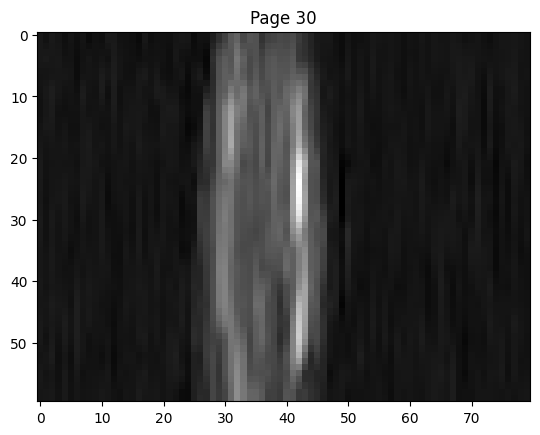

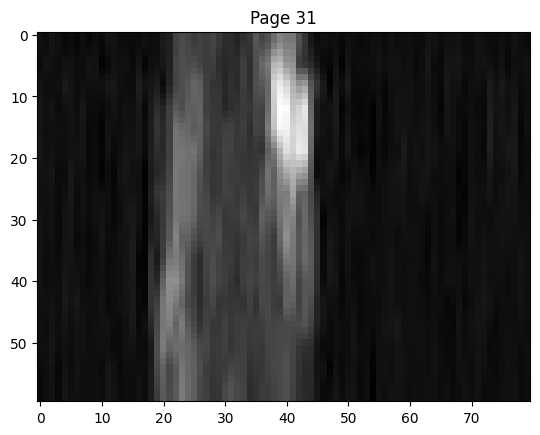

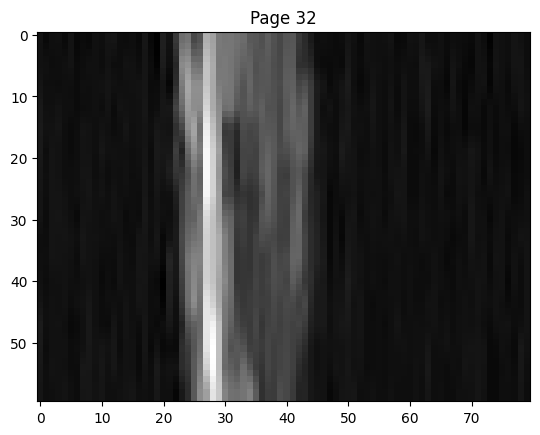

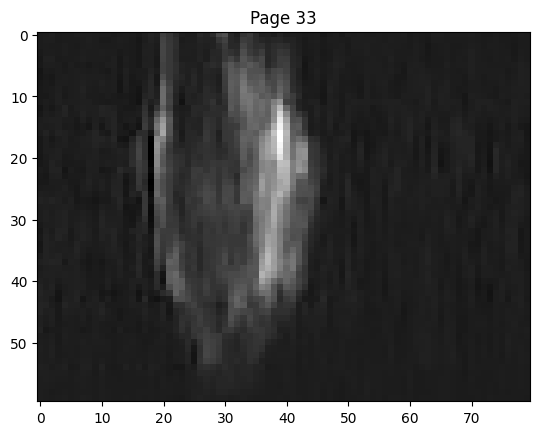

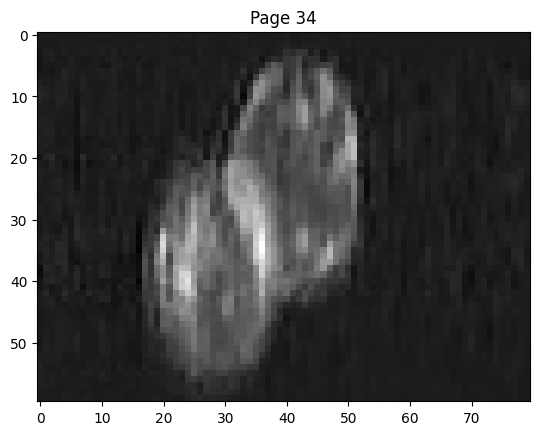

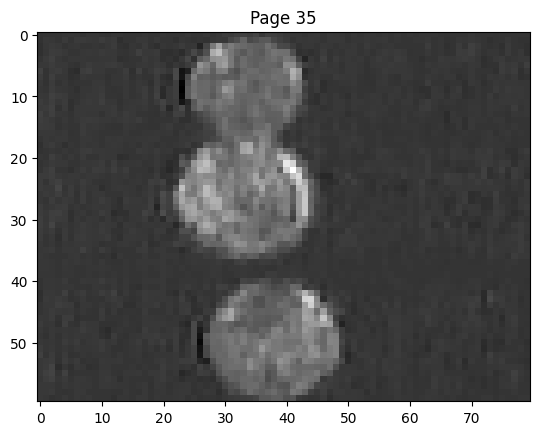

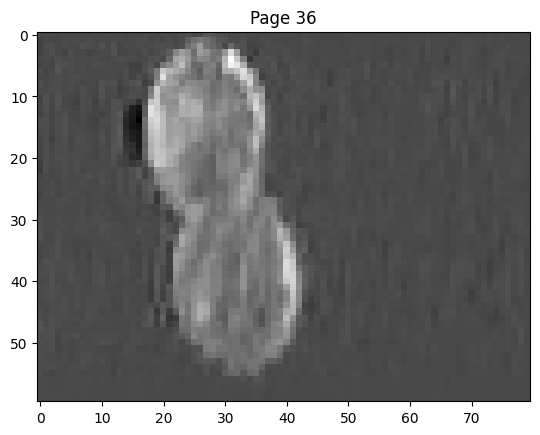

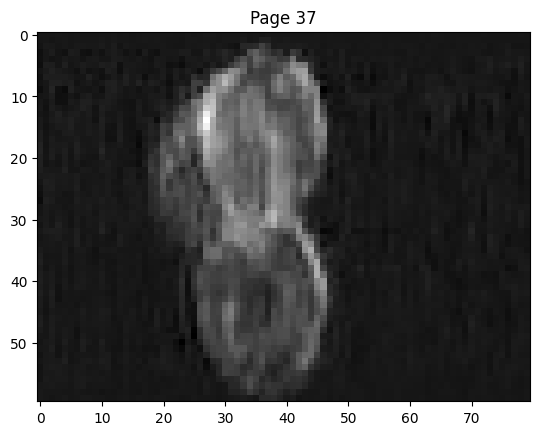

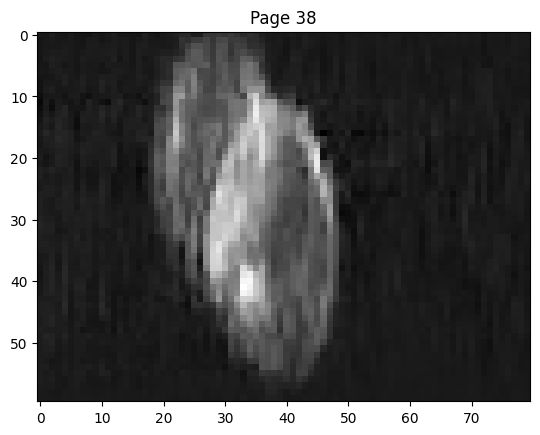

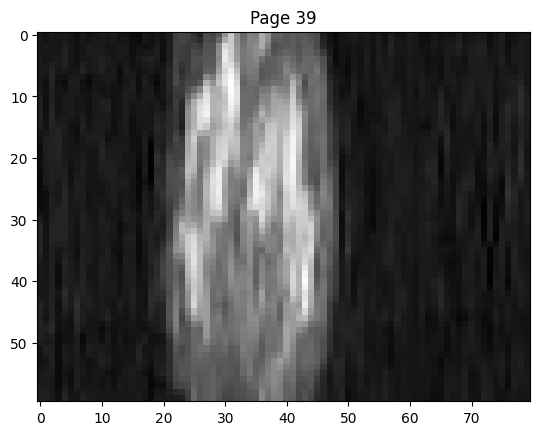

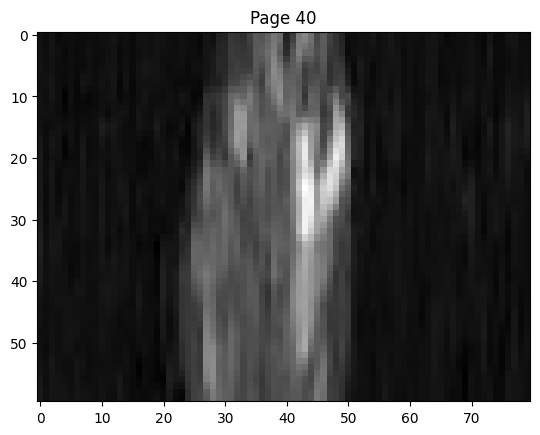

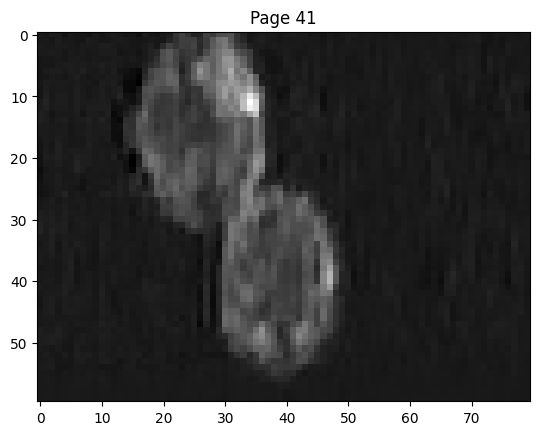

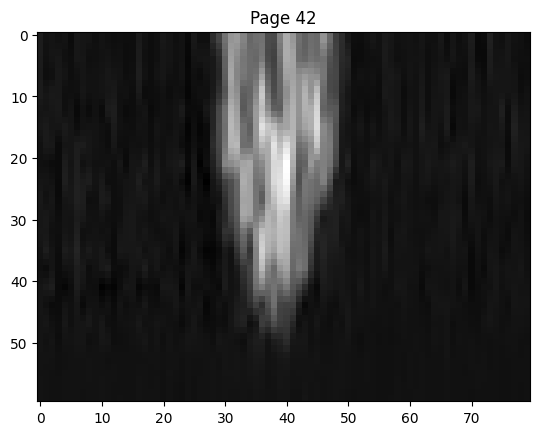

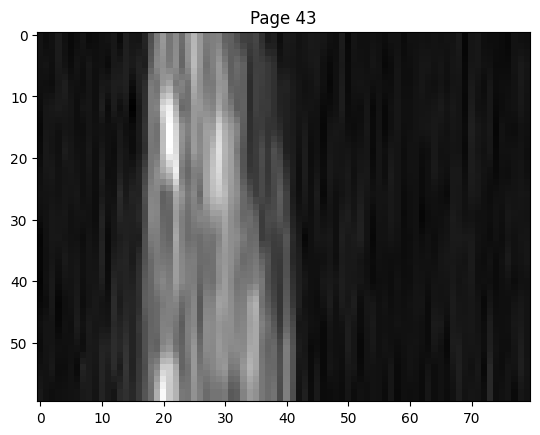

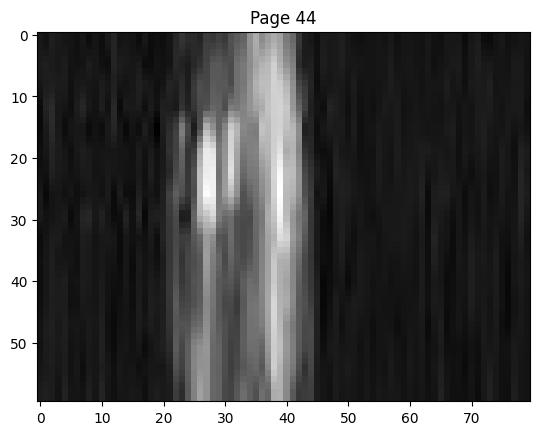

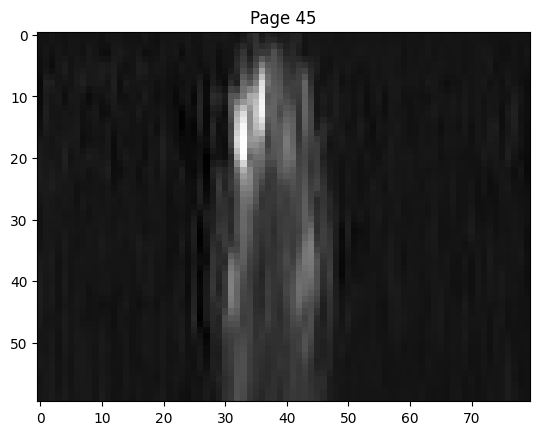

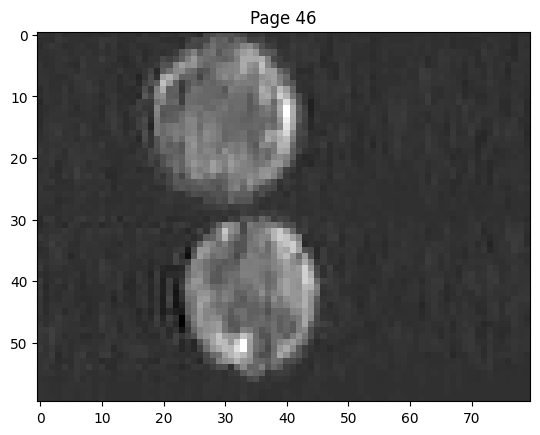

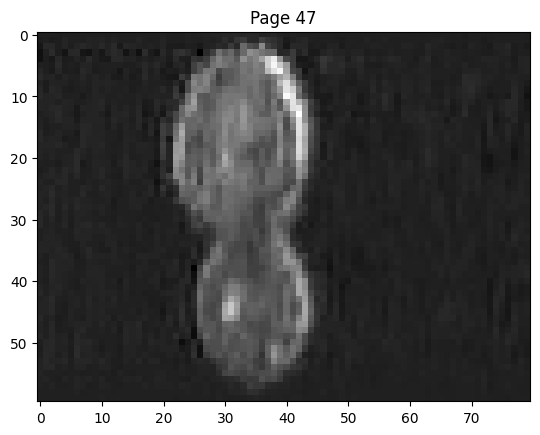

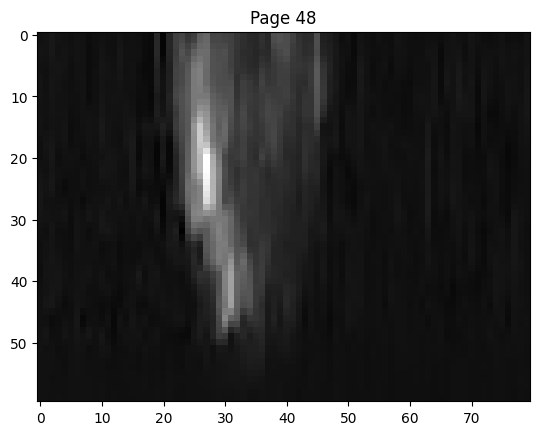

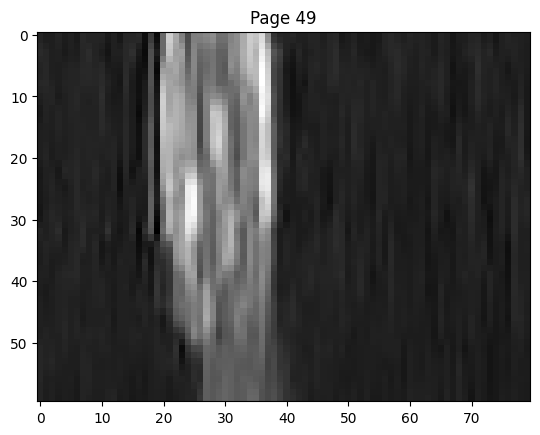

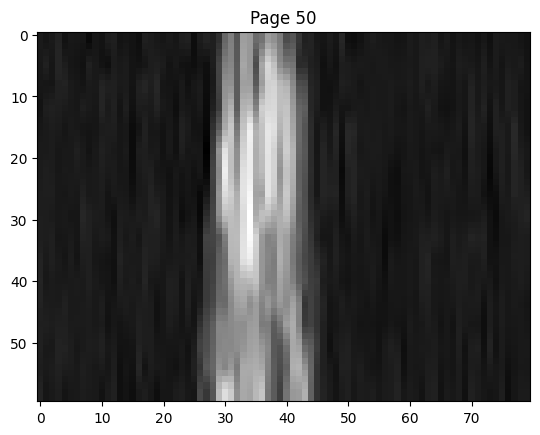

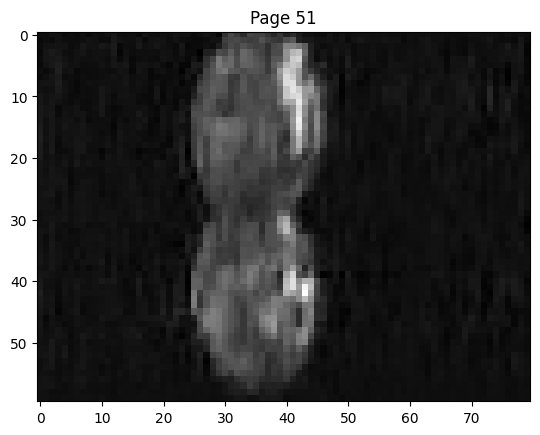

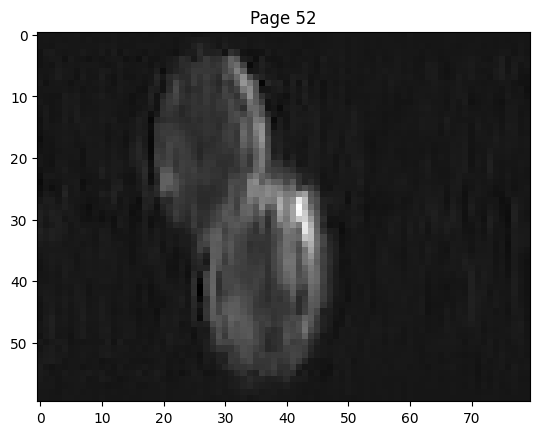

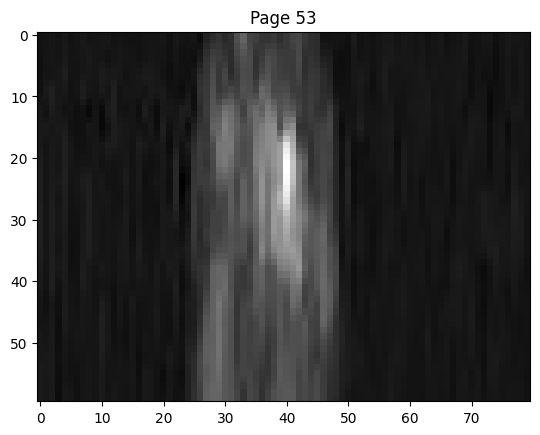

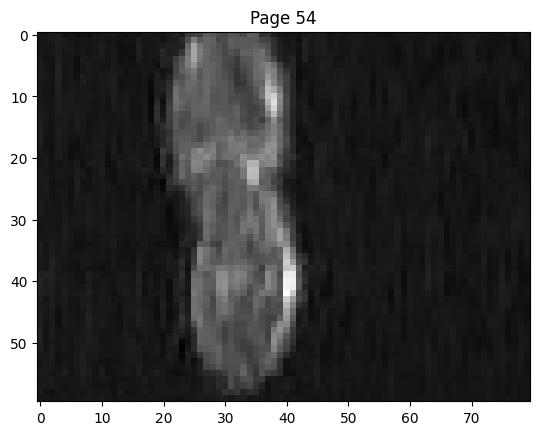

(60, 4800)


In [6]:
all_data = load_csv.load_pandas()

sample_data = load_csv.sample_data(
        load_csv.get_correct_data(all_data), 30
    )

sample_minority = load_csv.sample_data(load_csv.get_outliers(all_data), 25)

total_data = pd.concat([sample_data, sample_minority], ignore_index=True)

img = tiff.imread(sample_data["file_names"].iloc[0])

# for i, page in enumerate(img):
#     plt.imshow(page, cmap="gray")
#     plt.title(f"Page {i}")
#     plt.show()

X_train, y = fe.standardize(total_data)

for i, page in enumerate(X_train):
    if y[i] == 1:
        plt.imshow(page, cmap="gray")
        plt.title(f"Page {i}")
        plt.show()

flattened_features = X_train.reshape(55, 60*80)

sm = SMOTE(random_state=42, sampling_strategy="minority")

smote_features, smote_y = sm.fit_resample(flattened_features, y)

images = smote_features.reshape(60, 60, 80)

print(smote_features.shape)

# for i, page in enumerate(images):
#     if smote_y[i] == 1:
#         plt.imshow(page, cmap="gray")
#         plt.title(f"Page {i}")
#         plt.show()
    

# plt.title("Standardized features")
# plt.imshow(extracted_features.squeeze(), cmap="gray")
# plt.show()